In [1]:
import tensorflow as tf
# 친구의 스타트업에 납치되지 말어라.
# 파이토치 어렵다고 안쓰지 말자
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50 # keras 홈페이지에 applications 참고
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [2]:
train_dir = "./data/catanddog/train"
test_dir = "./data/catanddog/test"

## 데이터 증강

In [3]:
# train 데이터 증강~~~
train_datagen = ImageDataGenerator(
    rescale = 1 / 255, # 255 로 맞춤
    horizontal_flip = True,
    # 종류 많으니 알아보기
)

# rescale = 1/255.0,  # 값을 0과 1사이로 변환
# rotation_range = 40, # 회전반경을 40도 이내로 설정
# width_shift_range = 0.2, # 너비반경 20%
# height_shift_range = 0.2, # 높이반경 20%
# shear_range = 0.2, # 층 밀림 강도 20%
# zoom_range = 0.2, # 확대 범위 20%
# hotizontal_flip = True, # 수평반전
# vertical_flip = True, # 수직반전
# fill_mode ='nearest'


# test 데이터 증강~~~
test_datagen = ImageDataGenerator(
    rescale = 1 / 255
)

In [5]:
# 디렉토리에서 파일 읽어서 통과 시키겠다~
train_generator = train_datagen.flow_from_directory(
    train_dir, # 파일 경로
    target_size = (224, 224), # 사이즈 224 맞춰줌
    batch_size = 32, # 데이터를 32씩 자르겠다 ~~
    class_mode = "binary" # 이진분류하려고
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = "binary"
)

Found 385 images belonging to 2 classes.
Found 92 images belonging to 2 classes.


## ResNet 모델 불러오기

In [7]:
base_model = ResNet50(
    weights ="imagenet", # 사전훈련된거 쓰겠다
    include_top = False, # 출력층 출력 안 하겠다
    input_shape = (224,224,3) # 입력층 shape 는 이렇게 받겠다
)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 


In [8]:
# 학습 안하겠다~
base_model.trainable = False

In [9]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(), # base_model 의 결과물을 뿔링 하고~~
    layers.Dense(1, activation = "sigmoid") # 출력층을 설정함
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

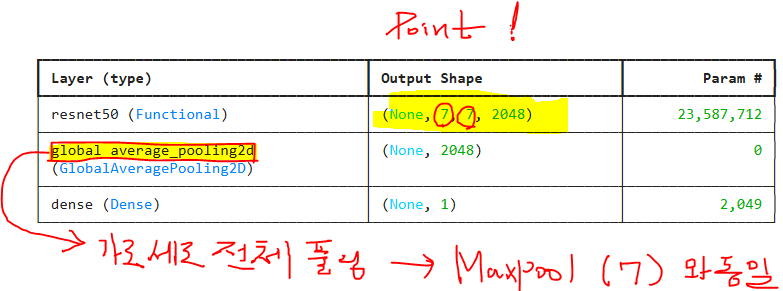

- 가로 7 세로 7의 데이터를 2048개의 특성수를 global average pooling 으로 줄여서 1차원으로 줄입니다

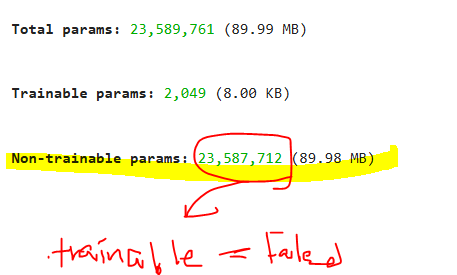

In [11]:
model.compile(
    optimizer= Adam(), 
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)
model.fit(
    train_generator, 
    validation_data = test_generator,
    epochs = 10
)

Epoch 1/10


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4442 - loss: 0.7124 - val_accuracy: 0.5326 - val_loss: 0.6949
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5299 - loss: 0.6965 - val_accuracy: 0.4674 - val_loss: 0.7412
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5247 - loss: 0.6941 - val_accuracy: 0.5326 - val_loss: 0.6922
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4753 - loss: 0.7043 - val_accuracy: 0.5435 - val_loss: 0.6909
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5247 - loss: 0.6885 - val_accuracy: 0.4565 - val_loss: 0.6963
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.5273 - loss: 0.6854 - val_accuracy: 0.4674 - val_loss: 0.7062
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5558 - loss: 0.6810 - val_accuracy: 0.4674 - val_loss: 0.7045
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5273 - loss: 0.6838 - val_accuracy: 0.4674 - val_loss: 0.7243
Epo

### 고사양 모델이라고 해서... 좋은게 아니여~~

- 데이터가 너무 작고 귀여워서 학습 안됨

- 데이터에 맞는 모델 쓰셈